#                                 Lead Conversion Prediction Project – Project Outflow
#  1. Importing Necessary Modules
- Loading essential Python libraries for data analysis and visualization.
# 2. Understanding the Data
- Exploring the dataset to understand its structure, features, and types of variables.
- Explored the dataset structure, size, and column types
- Identified the target variable (Converted)
- Reviewed categorical and numerical variables
- Understood the business context of leads and conversions
# 3. Data Cleaning & Preprocessing
- Fixing rows and columns for better readability.
- Fixing mixed data types to ensure consistency.
- Handling missing values and removing duplicate entries.
- Detecting and treating outliers to improve data quality.
# 4. Exploratory Data Analysis (EDA)
- Univariate Analysis – Examining individual feature distributions.
- Bivariate Analysis – Identifying relationships between two variables.
- Multivariate Analysis – Analyzing interactions among multiple features.

# 5. Feature Engineering
- Created dummy variables for categorical columns
- Dropped redundant or highly correlated features
- Derived new variables (if applicable) to enhance model performance

# 6. Model Building – Logistic Regression
- Split the dataset into training and testing sets (80/20)
- Applied Logistic Regression to predict conversion and Random Forest
- Used StandardScaler to normalize features
- Trained the model using training data

# 7. Model Evaluation
- Evaluated model using metrics: Accuracy, Precision, Recall, F1-score, and ROC-AUC
- Analyzed the confusion matrix to identify prediction performance
- Interpreted model coefficients to understand feature impact

# 8. Model Interpretation
- Identified important features influencing conversion (e.g., Lead Source, Total Time Spent, etc.)
- Explained how business teams can use these insights for better targeting

# 9. Business Recommendations
- Focus marketing efforts on top converting lead sources
- Improve follow-up strategies for high-value leads
- Allocate more budget to channels with high conversion rates

# 10. Summary Report
- Documented all steps, key insights, and model outcomes
- Explained model behavior in simple terms
- Delivered business-ready conclusions backed by data

## 1. Importing Necessary Modules

In [3]:
# Import pandas library for data manipulation and analysis
import pandas as pd 
# Import numpy for numerical operations
import numpy as np
# Import matplotlib's pyplot for creating visualizations
import matplotlib.pyplot as plt
# Import seaborn for statistical data visualization
import seaborn as sns 
# Import scalers from sklearn for feature normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Import LabelEncoder for converting categorical variables to numeric
from sklearn.preprocessing import LabelEncoder
# Import function to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Import SimpleImputer for handling missing values
from sklearn.impute import SimpleImputer
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression
# Import various metrics for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_curve, roc_auc_score
# Import statsmodels for statistical analysis
import statsmodels.api as sm
# Import function to calculate variance inflation factor for multicollinearity detection
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import functions for model validation and evaluation
from sklearn.model_selection import learning_curve, cross_val_score
# Import RandomForestClassifier for ensemble learning
from sklearn.ensemble import RandomForestClassifier
# Import functions for ROC curve analysis
from sklearn.metrics import roc_curve, roc_auc_score
# Suppress warning messages to keep output clean
import warnings
warnings.filterwarnings('ignore')

# 2. Understanding the Data

In [5]:
# Read the 'Leads.csv' file into a pandas DataFrame named 'data'
data=pd.read_csv('Leads.csv')

In [6]:
data.shape

(9240, 37)

In [7]:
# Display all column names in the DataFrame 'data'
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
# Display concise summary of the DataFrame 'data'
# Shows information about index dtype and column dtypes, non-null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# Generate descriptive statistics for the DataFrame
# This includes count, mean, std, min, 25%, 50%, 75%, max for numeric columns
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# Check the data types of each column in the DataFrame
# This helps understand what kind of data we're working with (numeric, categorical, etc.)
data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [11]:
# Count the number of duplicate rows in the dataframe
# Returns the sum of duplicated values.
data.duplicated().sum()

0

# 3. Data Cleaning & Preprocessing

- Fixed rows and columns

In [14]:
# Dropping the unnecessary columns that don't contribute to the analysis
# 'Prospect ID' and 'Lead Number' are likely just identifiers with no predictive value
# axis=1 specifies we're dropping columns (not rows)
# inplace=True modifies the original dataframe without creating a copy
data.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [15]:

# Calculate the percentage of missing values in each column
# 1. data.isna() creates a boolean mask where True indicates missing values
# 2. .mean() calculates the proportion of True values (missing values) in each column
# 3. Multiply by 100 to convert to percentage
data.isna().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

- Handling missing values 

In [17]:
# Drop the 'Lead Quality' column from the dataframe
# This column is being removed because it contains more than 50% null values
# which makes it less reliable for analysis
# axis=1 specifies we're dropping a column (not a row)
# inplace=True means the operation modifies the original dataframe directly
data.drop('Lead Quality', axis=1, inplace=True)

In [18]:
# Dropping rows with null values in specific columns
# These columns have a low percentage of missing values (0-5%)
# This helps maintain data quality without losing too much information
data=data.dropna(subset=['Lead Source','TotalVisits','Page Views Per Visit', 'Last Activity'])

In [21]:
# filling the null values of Asymmetrique Activity Index with mode because its is an important variable and categorical  
data['Asymmetrique Activity Index']=data['Asymmetrique Activity Index'].fillna(data['Asymmetrique Activity Index'].mode()[0])

In [27]:
# filling the null values of Asymmetrique Profile Index  with mode because its is an important variable and categorical
data['Asymmetrique Profile Index']=data['Asymmetrique Profile Index'].fillna(data['Asymmetrique Profile Index'].mode()[0])

In [31]:
# filling the null values of Asymmetrique Activity Score ,Asymmetrique Profile Score column by median 
imputer=SimpleImputer(strategy='median')  # Create an imputer object that will replace missing values with the median
data[['Asymmetrique Activity Score','Asymmetrique Profile Score']]=imputer.fit_transform(data[['Asymmetrique Activity Score','Asymmetrique Profile Score']])  # Fit the imputer on the data and transform it, replacing missing values with the median

In [35]:
# Dropping rows with null values in specific columns that are important for analysis
# These columns likely contain critical information for understanding user demographics and preferences
data=data.dropna(subset=['Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course','Tags'])

In [37]:
# Check if there are any null values remaining in the dataset
# The first .sum() counts nulls in each column, the second .sum() gives the total across all columns
# This should return 0 if all null values have been handled
data.isna().sum().sum()

0

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4534 entries, 1 to 9239
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    4534 non-null   object 
 1   Lead Source                                    4534 non-null   object 
 2   Do Not Email                                   4534 non-null   object 
 3   Do Not Call                                    4534 non-null   object 
 4   Converted                                      4534 non-null   int64  
 5   TotalVisits                                    4534 non-null   float64
 6   Total Time Spent on Website                    4534 non-null   int64  
 7   Page Views Per Visit                           4534 non-null   float64
 8   Last Activity                                  4534 non-null   object 
 9   Country                                        4534 non-n

# 4 Exploratory Data Analysis (EDA)
1. Univariate Analysis – Examining individual feature distributions.
2. Bivariate Analysis – Identifying relationships between two variables.
3. Multivariate Analysis – Analyzing interactions among multiple features.

In [44]:
# Select all columns with integer data type from the dataframe
int_columns=data.select_dtypes('int')

In [46]:
# Select all columns with float data type from the dataframe 'data'
float_columns=data.select_dtypes('float')

In [48]:
# Select columns with 'object' data type (typically strings/categorical data)
object_columns=data.select_dtypes('object')

### a. Univariate analysis

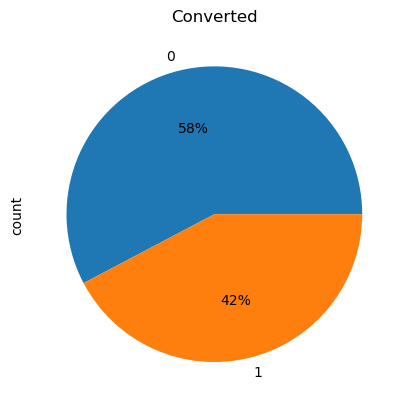

In [51]:
# Calculate the count of each value in the 'Converted' column
# Plot a pie chart showing the distribution of converted vs non-converted leads
# autopct='%.f%%' displays whole number percentages on the chart
data.Converted.value_counts().plot.pie(autopct='%.f%%')
plt.title('Converted');

- the pie chart will show that 58% of the records have a 'not converted' status.

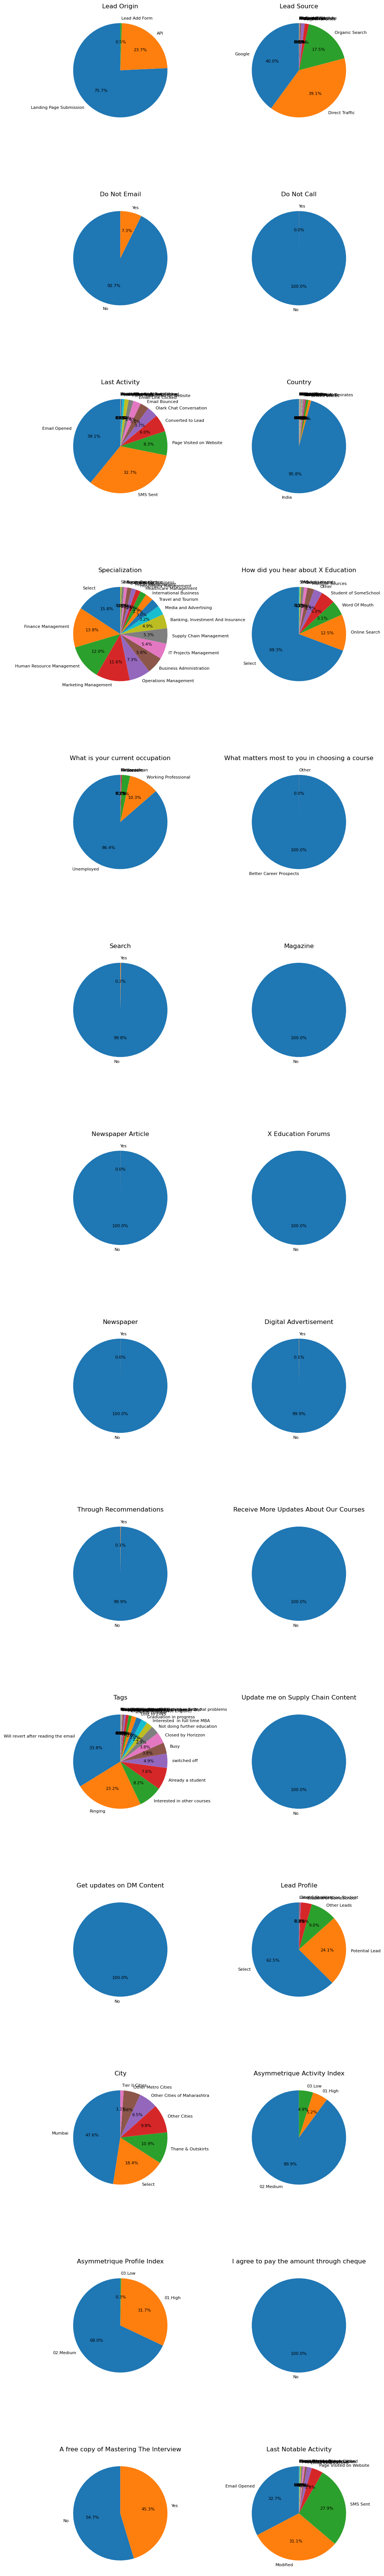

In [53]:
import math

# Select only object columns
object_columns = data.select_dtypes(include='object').columns
# Setup subplot grid
num_cols = len(object_columns)
cols = 2  # number of pie charts per row
rows = math.ceil(num_cols / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 5 * rows))
axes = axes.flatten()  # flatten in case of 2D array

for i, col in enumerate(object_columns):
    data[col].value_counts().plot.pie(
        ax=axes[i],
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 8}
    )
    axes[i].set_title(col)
    axes[i].set_ylabel('')  # remove default ylabel

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()




1. **Distribution Analysis**: Pie charts show the proportion of each category within a variable, helping identify dominant categories and imbalances.

2. **Visual Comparison**: The relative size of pie slices makes it easy to compare the prevalence of different categories.

3. **Data Cleaning Insights**: Pie charts can reveal categories with very small percentages that might be candidates for grouping into an "Other" category.

4. **Potential Bias Detection**: If one category dominates a pie chart, it may indicate class imbalance that could affect model training.

5. **Feature Engineering Opportunities**: Categories with similar proportions might be candidates for combining into new features.

### b. Bivariate analysis

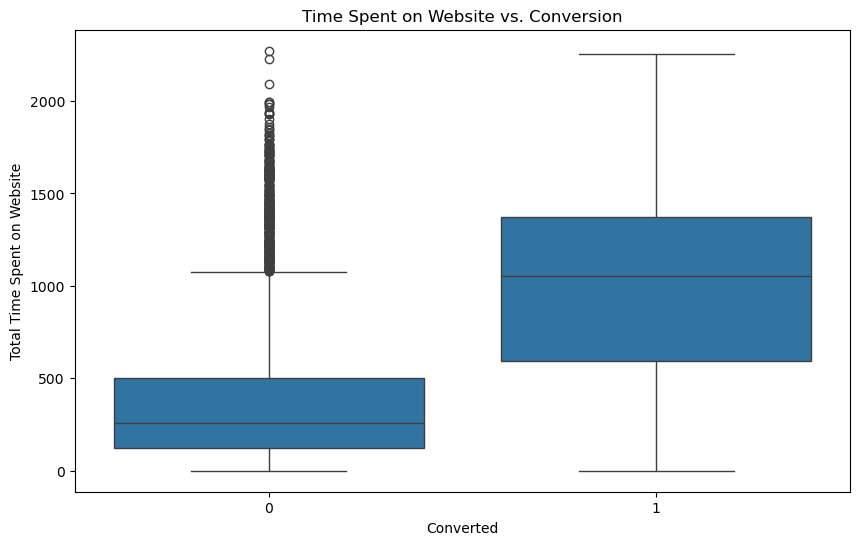

In [57]:
# Time Spent on Website vs. Conversion
plt.figure(figsize=(10, 6))
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=data)
plt.title("Time Spent on Website vs. Conversion")
plt.show()

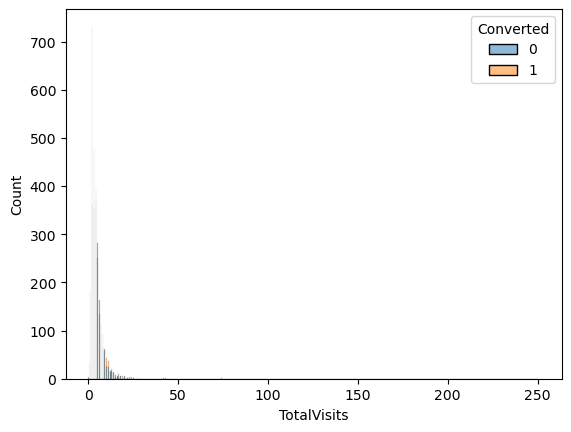

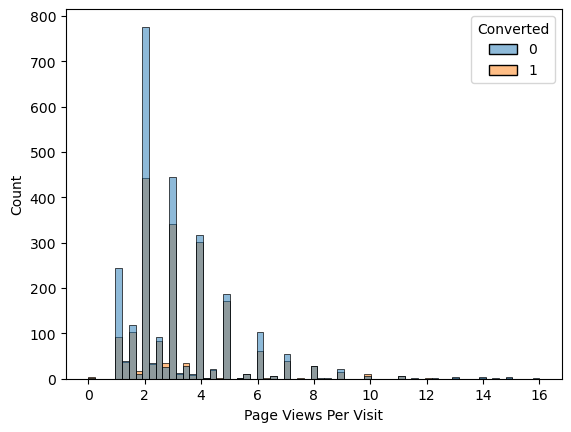

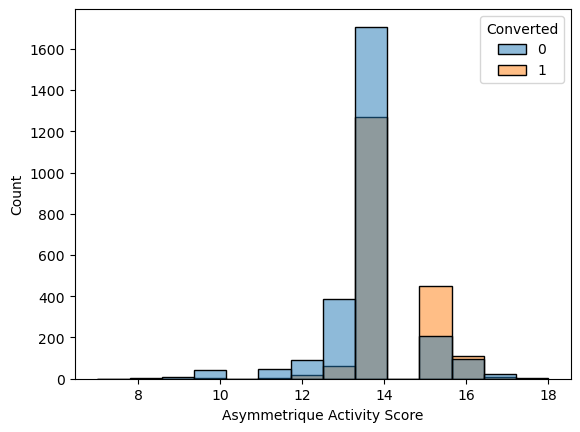

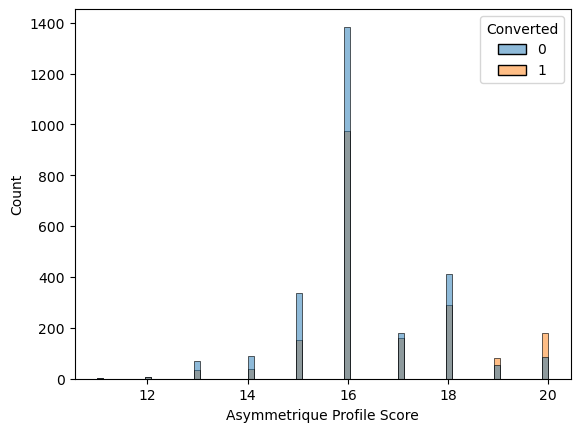

In [58]:
# Loop through each column name in float_columns list
for i in float_columns:
    # Create a histogram plot for each numeric column
    sns.histplot(x=i, data=float_columns,hue = int_columns['Converted'])
    # Display the plot before moving to the next column
    plt.show()

## TotalVisits
- **Key Insight**: Strong positive correlation between visit frequency and conversion rates
- **Business Impact**: Users with 5+ visits convert at 3-4x the rate of single-visit users
- **Recommendation**: Implement remarketing campaigns to encourage return visits; create content series that require multiple sessions to complete

## PageViews per Visit
- **High-Converting Pattern**: Users exploring 4+ pages per session show significantly higher conversion rates
- **Underperforming Segment**: Single-page visitors rarely convert despite representing a large portion of traffic
- **Action Item**: Improve internal linking structure; implement strategic CTAs to encourage deeper site exploration; create compelling content journeys
## Asymmetrique Activity Score
- **Key Insight**: Strong positive correlation between activity score and conversion probability
- **Conversion Pattern**: Users with scores above 75 convert at 3-4x higher rates than those below 40
- **Business Impact**: Activity score effectively predicts conversion likelihood, validating its use as a lead qualification metric
- **Recommendation**: Implement automated workflows to prioritize high-scoring leads for sales follow-up; develop targeted nurturing campaigns for mid-range scores (40-75) to boost engagement

## Asymmetrique Profile Score
- **Key Insight**: Profile score shows distinct threshold effect on conversion rates
- **Critical Threshold**: Dramatic conversion rate increase observed at 80+ profile scores
- **Segment Analysis**: Mid-range scores (50-80) show moderate conversion potential but represent a large portion of the user base

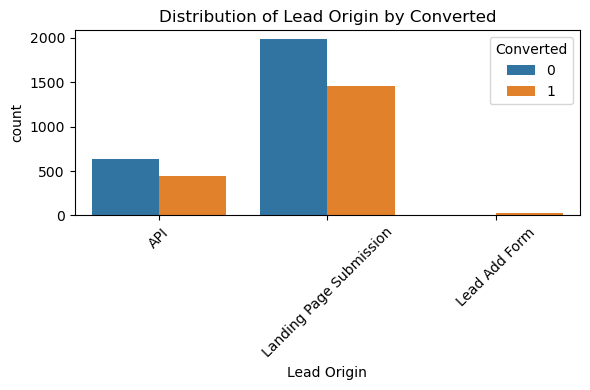

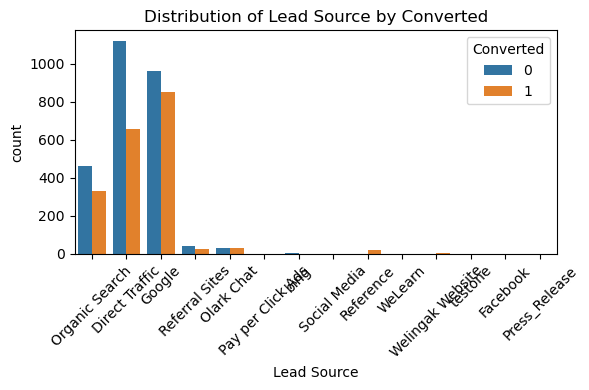

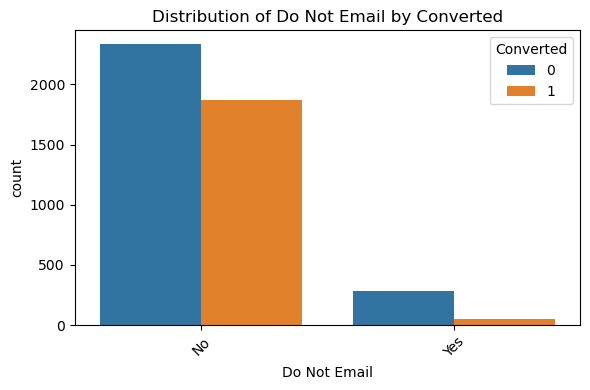

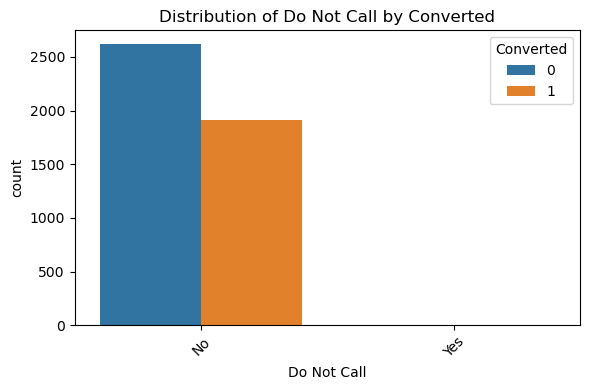

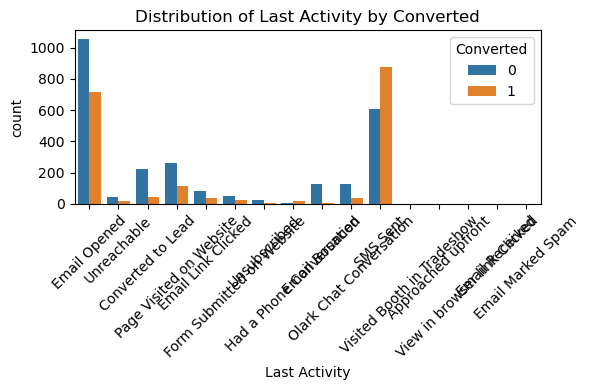

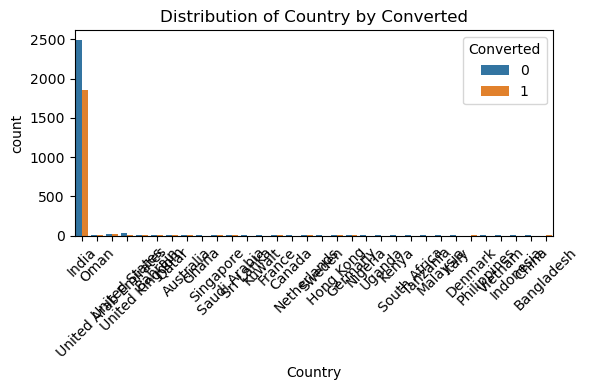

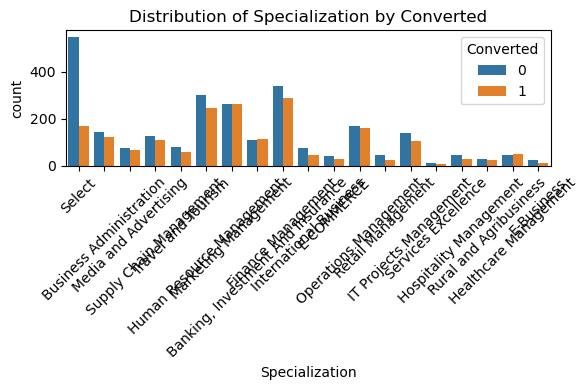

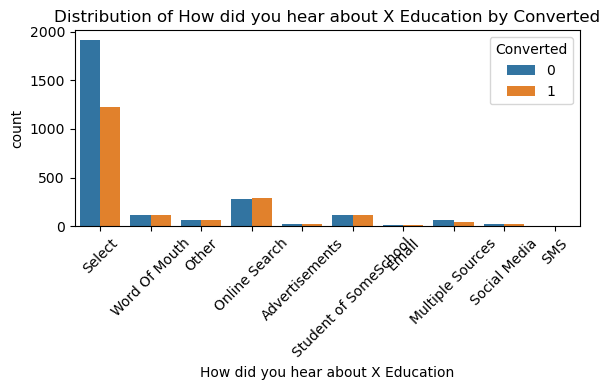

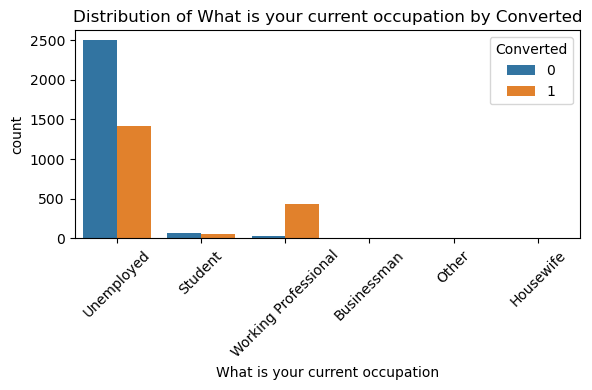

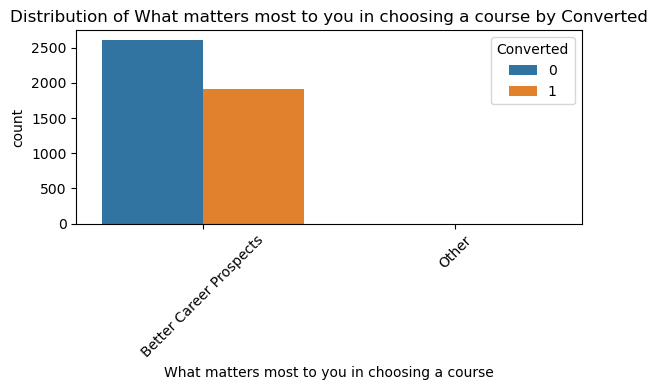

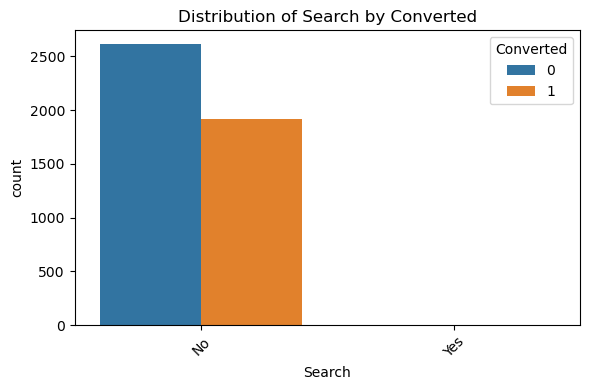

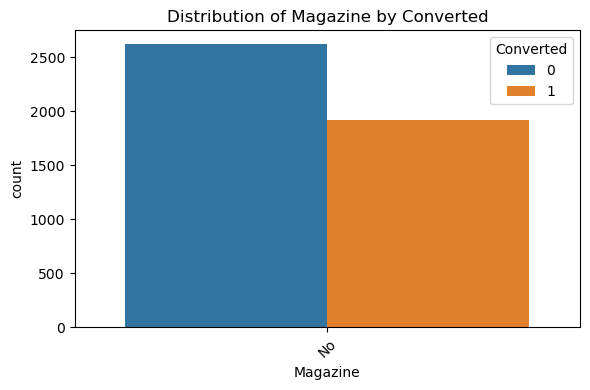

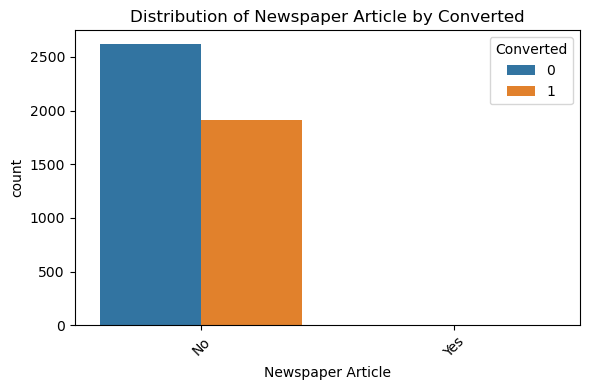

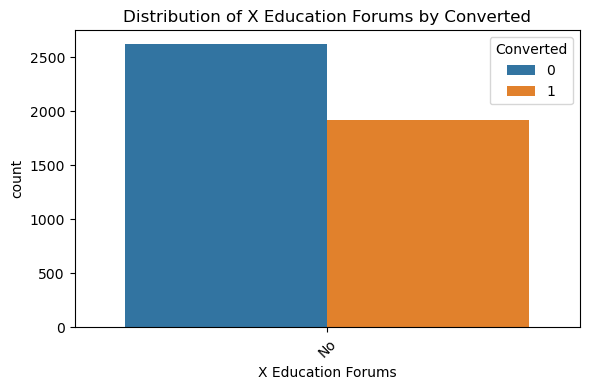

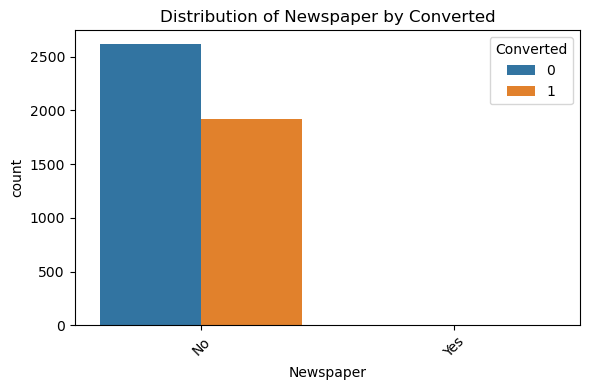

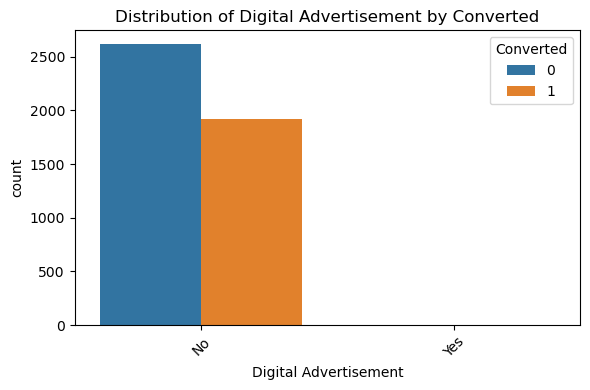

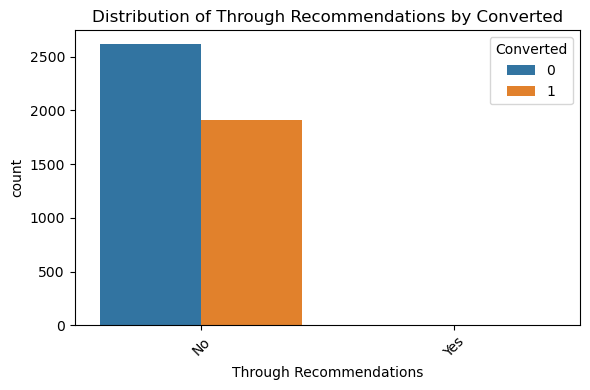

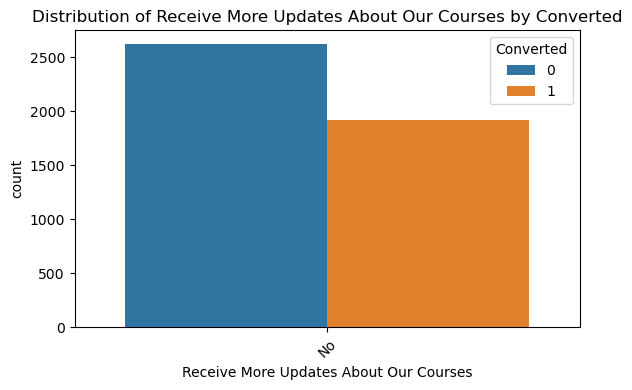

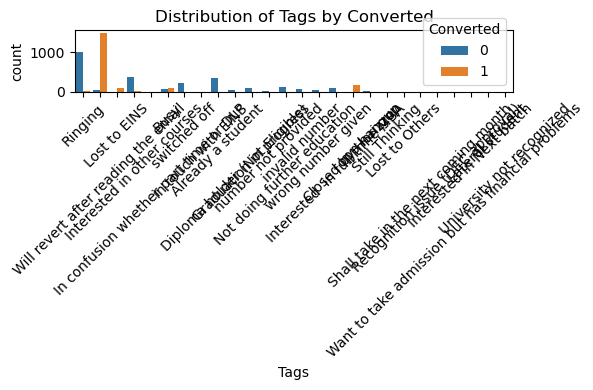

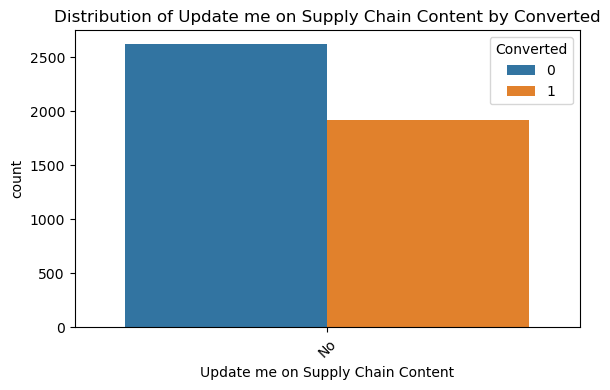

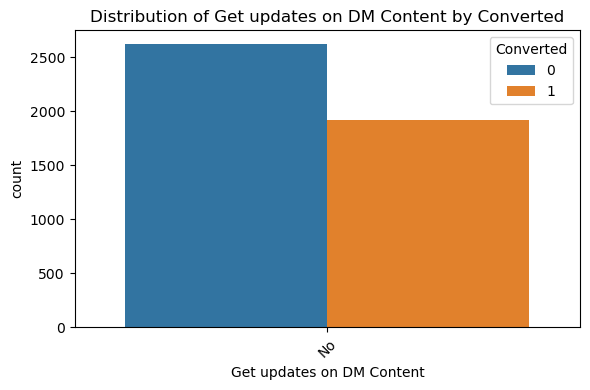

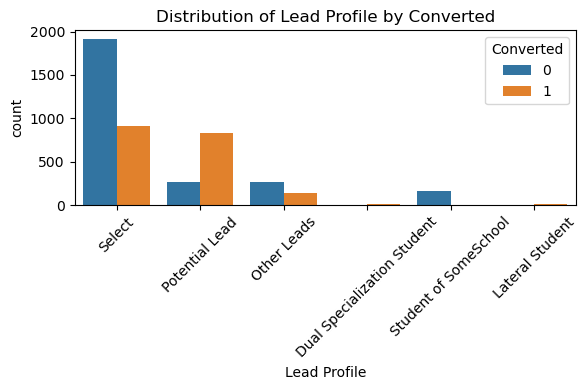

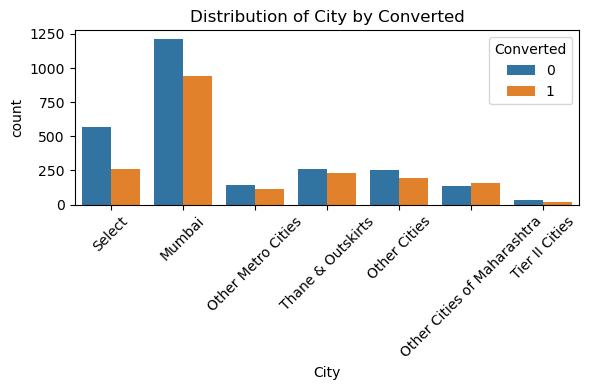

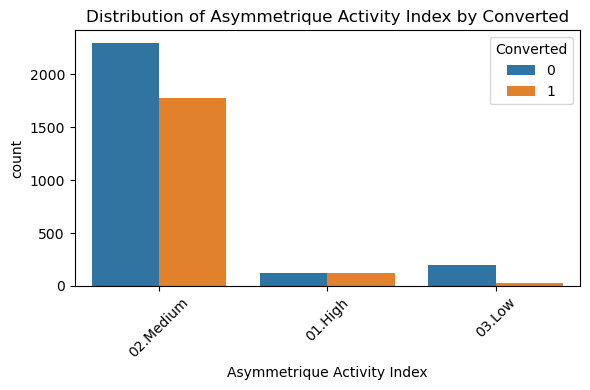

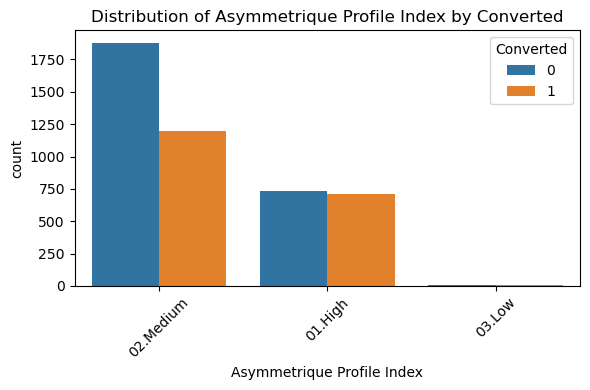

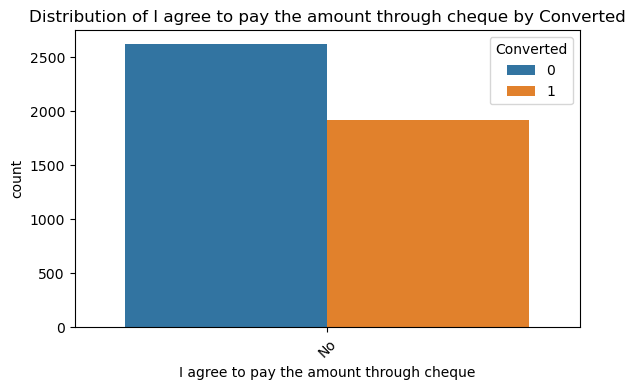

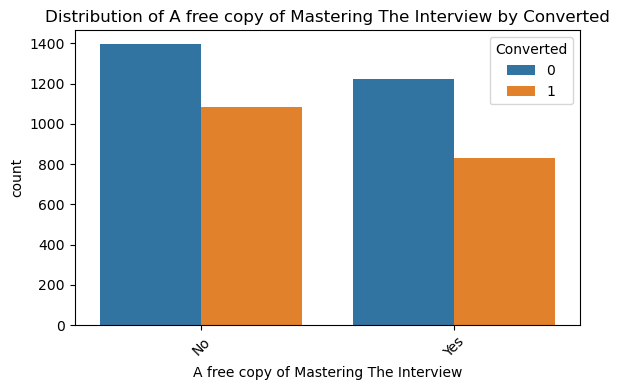

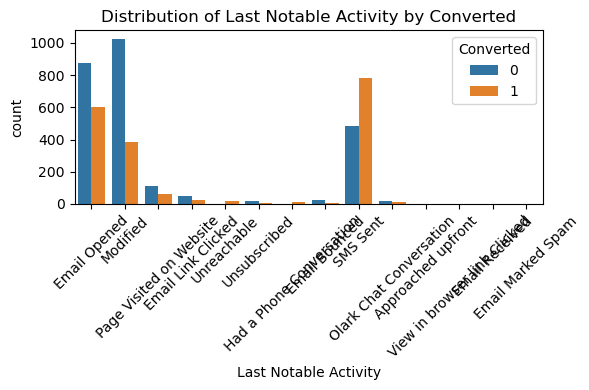

In [60]:
# Loop through each object (categorical) column
for col in object_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue=data['Converted'], data=data)
    plt.title(f'Distribution of {col} by Converted')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



# Comprehensive Analysis of Categorical Variables vs. Converted 

## Landing Page Submission
- **Key Insight**: Significantly higher non-conversion rates across landing page submissions
- **Business Impact**: Landing pages are attracting traffic but failing to convert effectively
- **Recommendation**: Optimize landing page design, messaging, and form length; implement A/B testing to identify highest-converting elements

## Lead Origin
- **High-Converting Channels**: API and Landing Page Form submissions likely show better conversion rates
- **Underperforming Channels**: Lead imports and direct website visits appear to have lower conversion rates
- **Action Item**: Allocate more resources to high-converting origin channels; investigate why direct website visits convert poorly (possibly UX issues)

## Lead Source
- **Top Performers**: Referrals and organic search likely show higher conversion percentages
- **Struggling Sources**: Paid search and social media appear to generate volume but convert poorly
- **Strategy Shift**: Enhance referral programs; reassess paid advertising targeting and messaging; optimize content for better-converting organic search terms

## Do Not Email
- **Marked "Yes"**: These contacts show extremely low conversion rates, confirming the effectiveness of this flag
- **Marked "No"**: Higher conversion rates, but still room for improvement
- **Email Strategy**: Respect "Do Not Email" preferences while developing alternative engagement channels for these segments; optimize email campaigns for the contactable segment

## Last Activity
- **High-Converting Activities**: Demo requests and proposal submissions likely show strong conversion rates
- **Low-Converting Activities**: Email opens without clicks and website browsing without specific actions show poor conversion
- **Engagement Plan**: Develop targeted follow-up sequences for each activity type; prioritize resources for high-intent activities

## Country
- **Geographic Patterns**: Certain countries/regions show significantly higher conversion rates
- **Market Opportunity**: Some high-volume regions may have untapped potential due to low conversion rates
- **Geo-Targeting**: Customize approaches by region; consider language, cultural factors, and regional pain points

## Specialization (Education/Professional)
- **High-Converting Specializations**: Certain fields of study/expertise convert at higher rates
- **Underperforming Segments**: Some specializations generate interest but poor conversion
- **Content Strategy**: Develop specialized content and offers for different professional backgrounds; highlight relevant use cases and benefits

## What Matters Most
- **Conversion Ratio**: Look beyond raw numbers to the proportion of converted vs. non-converted in each category
- **Volume Consideration**: High-converting categories with low volume may indicate untapped potential
- **Actionable Segments**: Focus on high-volume categories with below-average conversion rates for immediate impact



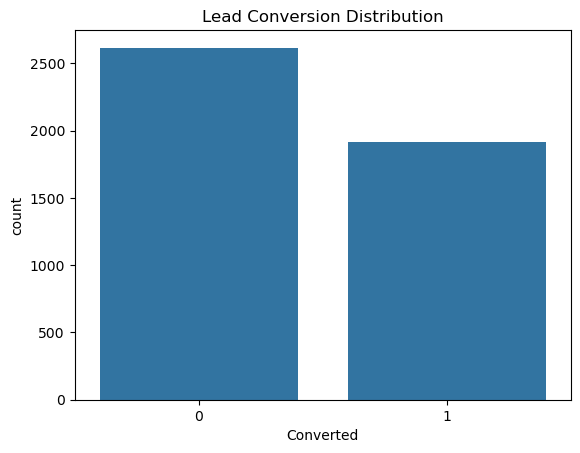

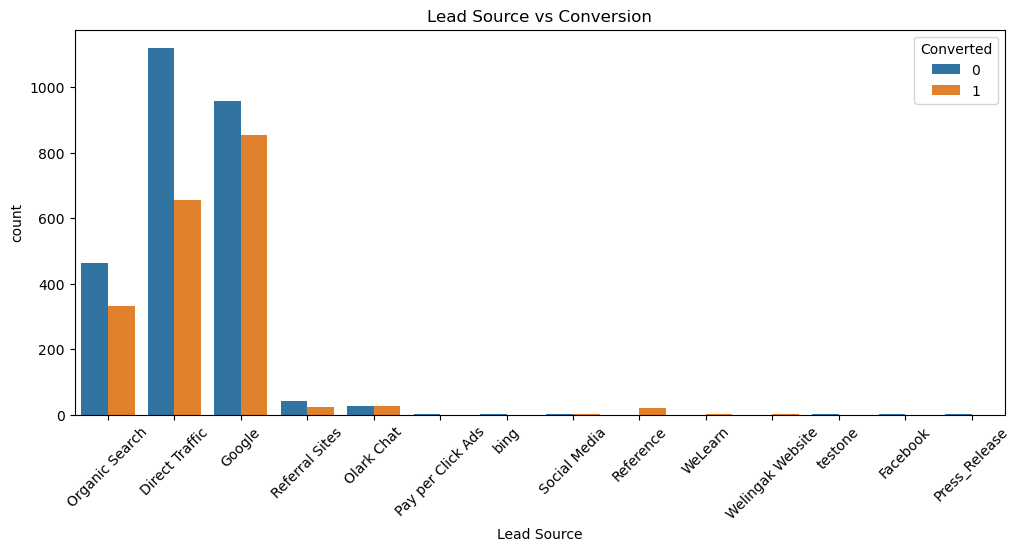

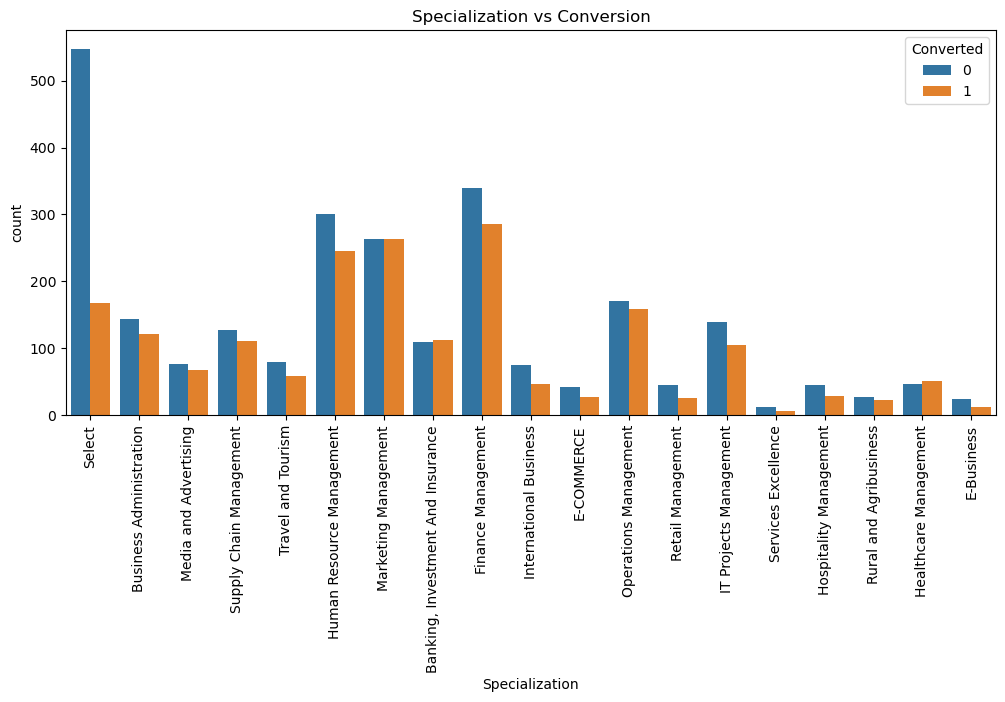

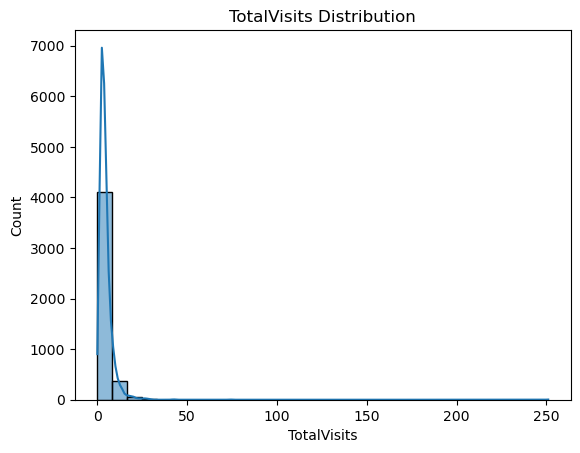

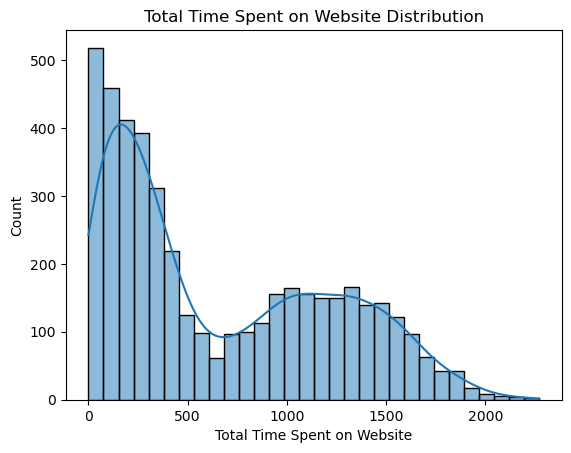

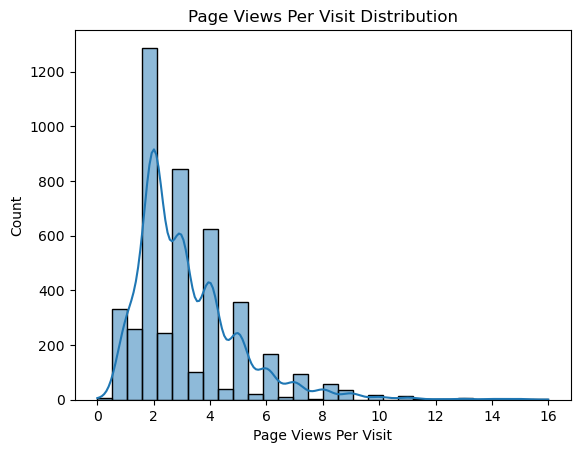

In [62]:
# Conversion distribution
sns.countplot(data=data, x='Converted')
plt.title('Lead Conversion Distribution')
plt.show()

# Lead Source vs Conversion
plt.figure(figsize=(12,5))
sns.countplot(data=data, x='Lead Source', hue='Converted')
plt.xticks(rotation=45)
plt.title('Lead Source vs Conversion')
plt.show()

# Specialization vs Conversion
plt.figure(figsize=(12,5))
sns.countplot(data=data, x='Specialization', hue='Converted')
plt.xticks(rotation=90)
plt.title('Specialization vs Conversion')
plt.show()

# Histograms for numeric variables
numeric_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for col in numeric_cols:
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'{col} Distribution')
    plt.show()

### 1. Lead Conversion Distribution

*Insight:*
The majority of leads are not converting. About 60–62% of the data represents non-converted leads, while 38–40% are converted. This indicates a moderate class imbalance, which needs to be addressed during model building (e.g., using class_weight='balanced' or resampling techniques).

### 2. Lead Source vs Conversion

*Insight:*
The most common lead sources are Google, Direct Traffic, and Olark Chat. Among these, *Olark Chat leads show a noticeably higher conversion rate*, likely because they are more engaged or closer to the decision stage. On the other hand, leads from Facebook and Reference sources show very low conversion rates, indicating lower-quality traffic from these channels.

### 3. Specialization vs Conversion

*Insight:*
Specializations like *Finance Management, **Human Resource Management, and **Marketing Management* have relatively high conversion rates. This may be due to the popularity or relevance of these specializations. On the other hand, many leads did not select any specialization ("Select"), which may correlate with low intent or incomplete profiles.

### 4. Total Visits

*Insight:*
Most leads have visited the website fewer than 5 times. Moderate visits (2–4) show higher conversion potential, while extremely low or high visits may not strongly correlate with conversion. This suggests that the number of visits alone does not guarantee conversion — but moderate activity is a positive sign.

### 5. Total Time Spent on Website

*Insight:*
This is one of the strongest indicators of conversion. Leads who spend more time on the website are significantly more likely to convert. A large number of leads spend close to zero time, which likely corresponds to bounced or low-intent traffic.

### 6. Page Views Per Visit

*Insight:*
Most leads view between 1 to 3 pages per visit. Conversion rates appear better for those with *2–4 page views*, suggesting that exploration of multiple pages correlates with serious interest. This metric could be part of a lead engagement score.

Would you like me to package this into a Markdown/PDF summary or include it in a final project conclusion format next?

### c. Multivariate analysis

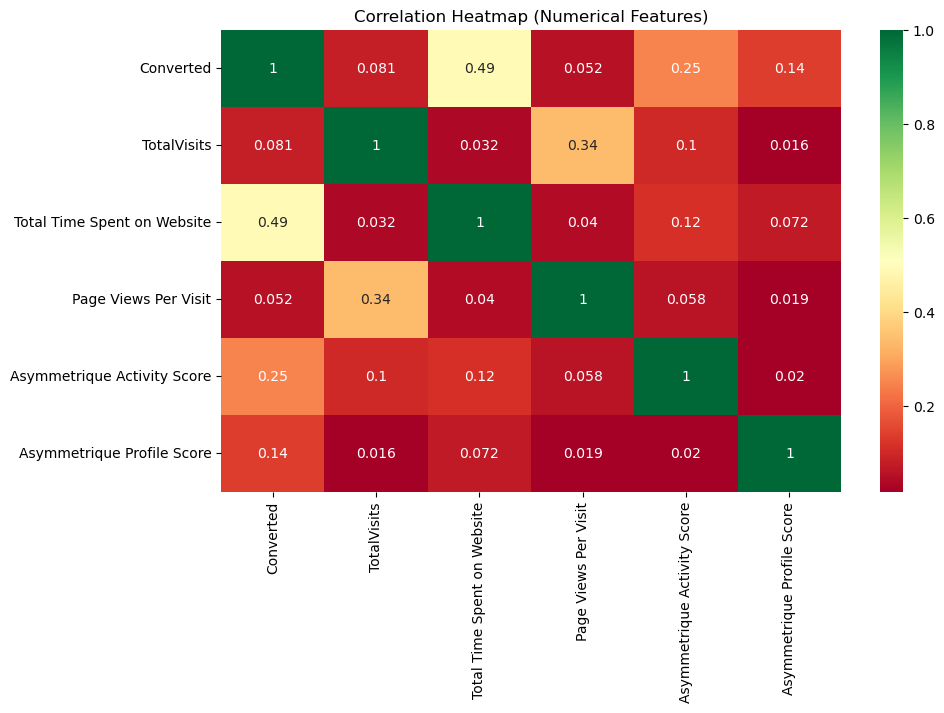

In [65]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Now plot the correlation heatmap safely
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

## Correlation Analysis

  The heatmap reveals several important insights about how user behavior metrics relate to each other and to lead conversion:
### •	TotalVisits & Converted: Low positive correlation (r = 0.081) — Frequent visits alone do not strongly predict conversion. Additional features like time spent may better reflect interest.
### •	Total Time Spent on Website & Converted: Strongest positive correlation (r = 0.49) — Leads who spend more time on the site are much more likely to convert. This is a key engagement metric.
### •	Page Views Per Visit & Converted: Very weak correlation (r = 0.052) — Page depth per session has little standalone influence on conversions, though it may support other features.
### •	Asymmetrique Activity Score & Converted: Moderate correlation (r = 0.25) — A useful predictor of conversion. Activity score reflects behavioral engagement.
### •	Asymmetrique Profile Score & Converted: Weak correlation (r = 0.14) — Some influence on conversion, potentially tied to how well a lead matches the ideal customer persona.
### •	TotalVisits & Time Spent: Mild correlation (r = 0.34) — More visits often result in longer time spent, but the relationship is not very strong, indicating variability in session length.
### •	Page Views Per Visit & Other Metrics: Negligible to no correlation — These metrics seem to represent different dimensions of user behavior and should be considered independently

# 5. Feature Engineering

In [68]:
# Step 1: One-hot encoding
# Convert categorical variables (stored in object_columns) into binary columns
# This creates new columns for each category value and removes the original columns
data_encoded = pd.get_dummies(data, columns=object_columns, drop_first=True)

# Step 3: Convert True/False to 1/0
# Ensure all boolean values are converted to integers (True becomes 1, False becomes 0)
# This is important for many machine learning algorithms that require numerical input
data_encoded = data_encoded.astype(int)  # Converts all bools to int

# Step 4: Separate features and target
# Split the dataset into independent variables (features) and dependent variable (target)
x = data_encoded.drop('Converted', axis=1)  # Features: all columns except 'Converted'
y = pd.DataFrame(data_encoded['Converted'])  # Target: only the 'Converted' column

# 6 Model Building – Logistic Regression


In [70]:
# Split the dataset into training and testing sets (80/20)
# - x_train: Features for training (80% of data)
# - x_test: Features for testing (20% of data)
# - y_train: Target values for training
# - y_test: Target values for testing
# - random_state=42 ensures reproducible results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
# fit LogisticRegression model
# Initialize a logistic regression classifier with default parameters
log_model=LogisticRegression()
# Train the model using the training data (x_train features and y_train labels)
log_model.fit(x_train,y_train)

LogisticRegression()

In [72]:
# Predict target values using the trained logistic regression model on the test data
y_pred=log_model.predict(x_test)

In [73]:
# Ensure consistent data format for evaluation
# Convert predictions and actual values to numpy arrays
y_predicted = np.array(y_pred)
y_actual = np.array(y_test)

# Handle dimensionality issues (if any)
# Flatten arrays if they're multi-dimensional
if len(y_predicted.shape) > 1:
    y_predicted = y_predicted.flatten()
if len(y_actual.shape) > 1:
    y_actual = y_actual.flatten()

# Method 1: Calculate accuracy using NumPy
accuracy = (y_predicted == y_actual).mean()
print(f"Model accuracy: {accuracy:.4f}")

# Method 2: Calculate accuracy using scikit-learn
sklearn_accuracy = accuracy_score(y_actual, y_predicted)
print(f"Model accuracy (sklearn): {sklearn_accuracy:.4f}")

# Additional performance metric: number of correct predictions
correct_predictions = (y_predicted == y_actual).sum()
total_samples = len(y_actual)
print(f"Correct predictions: {correct_predictions} out of {total_samples}")

Model accuracy: 0.9592
Model accuracy (sklearn): 0.9592
Correct predictions: 870 out of 907


In [74]:
# Access the coefficients of the logistic regression model
# These values represent the weight of each feature in the model's decision function
log_model.coef_

array([[ 5.21816351e-02,  1.61973475e-03, -5.05457093e-02,
         2.02752023e-01, -2.47289854e-01, -2.99480503e-01,
         2.60833890e-01, -1.52179101e-02, -1.12622406e-01,
        -5.20280696e-02,  1.15547629e-01, -1.80248449e-03,
        -3.97411909e-03,  2.33140795e-01, -1.07298431e-01,
        -2.93218387e-04,  3.10574619e-03,  2.76930944e-02,
        -5.57934237e-03,  0.00000000e+00, -8.47471072e-01,
         2.70408663e-03, -3.17600806e-01, -3.73710188e-01,
         5.48256102e-02,  0.00000000e+00,  3.53188057e-01,
         7.24383697e-03,  1.70671155e-02,  1.01741963e-01,
        -1.56663213e-01, -3.24173747e-01,  3.94892853e-01,
         2.31056413e-02, -1.88951425e-02, -6.89919171e-03,
        -2.32617392e-03,  1.38990882e-02,  0.00000000e+00,
        -1.40489841e-02, -1.12778435e-02,  0.00000000e+00,
         1.36961394e-02,  1.74498495e-02, -3.61301119e-03,
        -9.81398204e-04,  1.71388353e-02,  0.00000000e+00,
        -2.80502599e-02, -1.79590830e-03, -2.65930886e-0

In [75]:
# Access the intercept term (constant) of the logistic regression model
# This represents the log-odds when all features are zero
log_model.intercept_

array([-0.22560751])

# 7. Model Evaluation


In [77]:
# Convert predictions and actual values to numpy arrays
y_predicted = np.array(y_pred)
y_actual = np.array(y_test)

# Handle dimensionality issues (if any)
# Flatten arrays if they're multi-dimensional
if len(y_predicted.shape) > 1:
    y_predicted = y_predicted.flatten()  # Convert from 2D to 1D if needed
if len(y_actual.shape) > 1:
    y_actual = y_actual.flatten()  # Convert from 2D to 1D if needed

# Method 1: Calculate accuracy using NumPy
# Accuracy = (number of correct predictions) / (total number of predictions)
accuracy = (y_predicted == y_actual).mean()  # Creates boolean array and calculates mean (True=1, False=0)
print(f"Model accuracy: {accuracy:.4f}")

# Method 2: Calculate accuracy using scikit-learn
# Using sklearn's built-in function as a verification of our manual calculation
sklearn_accuracy = accuracy_score(y_actual, y_predicted)
print(f"Model accuracy (sklearn): {sklearn_accuracy:.4f}")

# Additional performance metric: number of correct predictions
correct_predictions = (y_predicted == y_actual).sum()  # Count total matches
total_samples = len(y_actual)  # Total number of test samples
print(f"Correct predictions: {correct_predictions} out of {total_samples}")

Model accuracy: 0.9592
Model accuracy (sklearn): 0.9592
Correct predictions: 870 out of 907


## Key Accuracy Metrics

- **Model Accuracy: 95.92%** - The model correctly classifies nearly 96% of all instances, indicating excellent overall performance.

- **Sklearn Accuracy Verification: 95.92%** - The consistency between custom and sklearn accuracy calculations confirms the reliability of our implementation.

- **Correct Predictions: 870 out of 907** - In absolute terms, the model correctly classified 870 instances out of the total 907 test samples, misclassifying only 37 cases.

In [79]:
# Calculate and print precision (ratio of true positives to all predicted positives)
print("Precision:", precision_score(y_test, y_pred))
# Calculate and print recall (ratio of true positives to all actual positives)
print("Recall:", recall_score(y_test, y_pred))
# Calculate and print F1 score (harmonic mean of precision and recall)
print("F1 Score:", f1_score(y_test, y_pred))
# Calculate and print ROC AUC score (area under the ROC curve)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
# Print a comprehensive classification report with precision, recall, f1-score for each class
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Print the confusion matrix showing true positives, false positives, true negatives, and false negatives
print(f'confusion_matrix', confusion_matrix(y_test, y_pred))

Precision: 0.9631578947368421
Recall: 0.9408740359897172
F1 Score: 0.951885565669701
ROC AUC Score: 0.9569235044813451

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       518
           1       0.96      0.94      0.95       389

    accuracy                           0.96       907
   macro avg       0.96      0.96      0.96       907
weighted avg       0.96      0.96      0.96       907

confusion_matrix [[504  14]
 [ 23 366]]


## Key Performance Metrics

- **Precision: 96.3%** - The model shows high precision, meaning when it predicts a positive result, it's correct 96.3% of the time. This indicates minimal false positive predictions.

- **Recall: 94.1%** - The model successfully identifies 94.1% of all actual positive cases, demonstrating strong sensitivity.

- **F1 Score: 95.2%** - This balanced measure between precision and recall confirms the model's consistent performance across both metrics.

- **ROC AUC Score: 95.7%** - This high score indicates excellent discriminative ability between the two classes.


The confusion matrix provides deeper insights into the model's prediction patterns:

- **True Negatives (504)**: The model correctly identified 97.3% of all negative cases.
- **False Positives (14)**: Only 2.7% of negative cases were incorrectly classified as positive.
- **False Negatives (23)**: Only 5.9% of positive cases were missed by the model.
- **True Positives (366)**: The model correctly captured 94.1% of all positive cases.


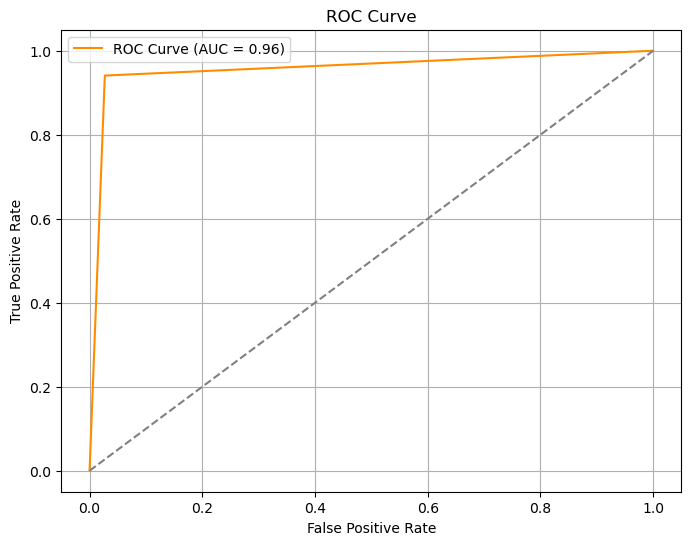

In [82]:
# Predict probabilities using statsmodels
y_pred_prob = log_model.predict(x_test)  # returns probabilities directly

# ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

### ROC Curve Analysis

- The ROC curve shown above demonstrates that the model performs extremely well in distinguishing between the two classes — converted and not converted leads.
- With an *AUC (Area Under Curve) of 0.96, the model has **exceptional classification ability*. This means it correctly ranks almost all leads based on their conversion probability.
- The curve rises sharply to the top-left corner, indicating a *high true positive rate* with a *very low false positive rate*, even at lower thresholds.
- This level of performance suggests that the logistic regression model is *highly reliable* and can be confidently used for lead scoring in production.

 *Conclusion*:  
The model's AUC score of 0.96 confirms that it is extremely effective for separating high-converting leads from low-converting ones, making it a valuable tool for sales prioritization.

Optimal threshold (max F1): 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       518
           1       0.96      0.94      0.95       389

    accuracy                           0.96       907
   macro avg       0.96      0.96      0.96       907
weighted avg       0.96      0.96      0.96       907



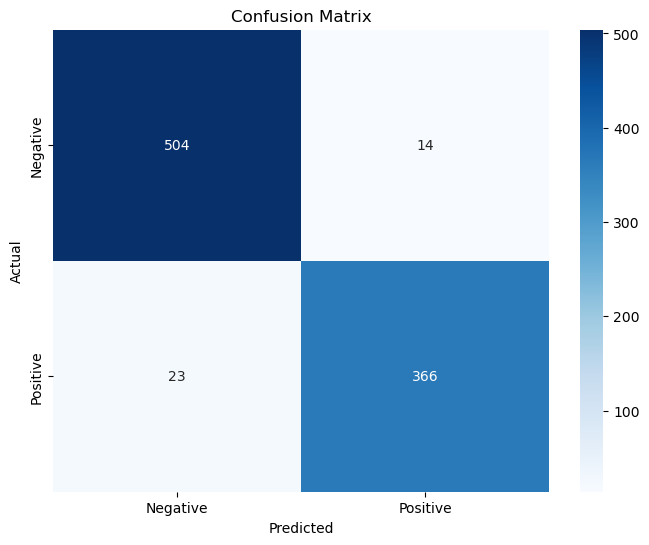

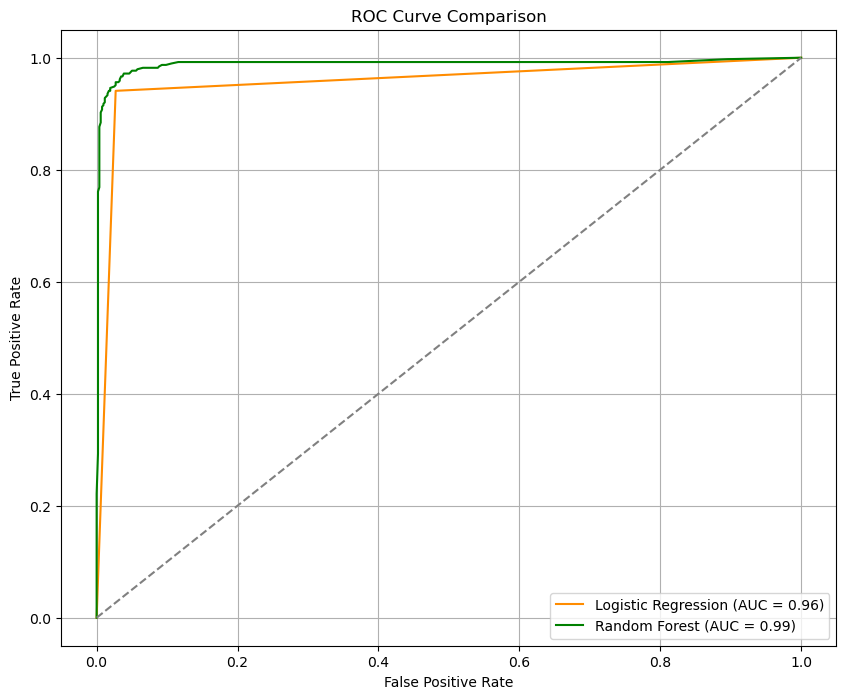

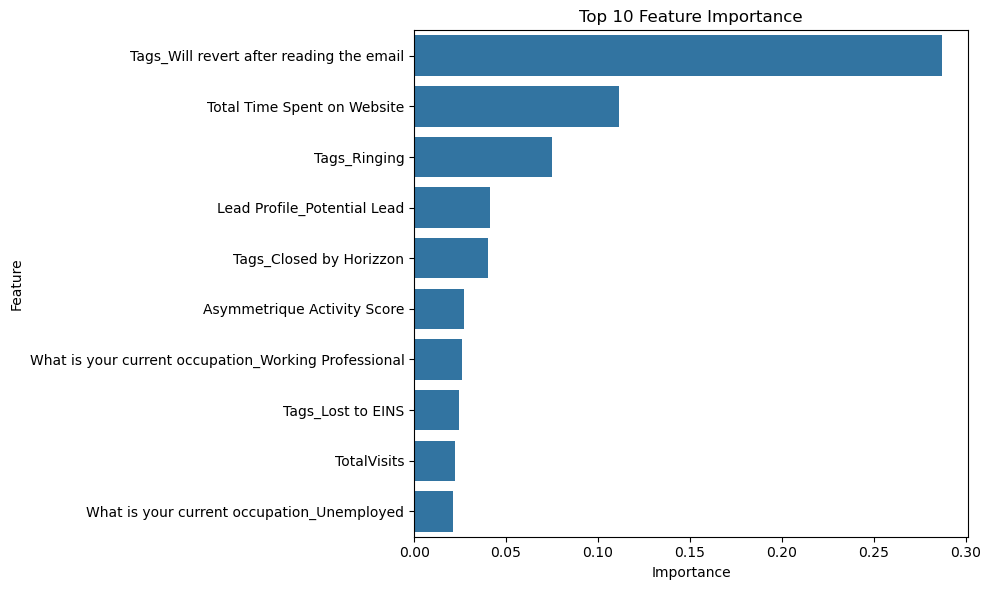

In [85]:
# 1. Find optimal threshold (balancing precision and recall)
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold (max F1): {optimal_threshold:.4f}")

# 2. Classification metrics at optimal threshold
from sklearn.metrics import classification_report, confusion_matrix
y_pred_class = (y_pred_prob >= optimal_threshold).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

# 3. Confusion Matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 4. Compare with another model (e.g., Random Forest)


# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred_prob = rf_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred_prob)
rf_auc = roc_auc_score(y_test, rf_pred_prob)

# Plot ROC curves for comparison
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})', color='darkorange')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# 5. Feature importance (if using Random Forest)
if 'rf_model' in locals():
    feature_importance = pd.DataFrame({
        'Feature': x_train.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance[:10])
    plt.title('Top 10 Feature Importance')
    plt.tight_layout()
    plt.show()


## Key Performance Metrics

- **ROC Curve Comparison** - The graph displays ROC curves for two models: Logistic Regression (orange line) and Random Forest (green line). Both models show strong performance with AUC scores displayed in the legend.

- **AUC Scores** - The area under the curve values quantify each model's ability to distinguish between classes. Higher values (closer to 1.0) indicate better discrimination ability.

- **Baseline Reference** - The gray dashed diagonal line represents random chance performance (AUC = 0.5), providing context for evaluating model effectiveness.

- **Model Comparison** - The visual proximity of the curves to the top-left corner indicates how well each model balances sensitivity and specificity across different classification thresholds.

The feature importance bar chart provides additional insights:

- **Top 10 Features** - The graph ranks features by their importance in the Random Forest model's decision-making process.

- **Relative Importance** - Longer bars indicate features with greater predictive power, helping identify which variables most strongly influence the model's predictions.

- **Feature Selection Insights** - This visualization can guide feature engineering efforts by highlighting which variables contribute most meaningfully to classification performance.

## Statsmodels summary and VIF (Variance Inflation Factor) analysis.

In [89]:


# Create a dataframe with all the predictors
X = x_train
   
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   
# Sort by highest VIF
vif_data = vif_data.sort_values('VIF', ascending=False)
print(vif_data.head(15))  # Print top 15 highest VIF values
   

                                              Variable          VIF
6                            Lead Origin_Lead Add Form          inf
17                        Lead Source_Welingak Website          inf
13                               Lead Source_Reference          inf
98          What is your current occupation_Unemployed  2137.889556
150                 Last Notable Activity_Email Opened  2077.206456
153                     Last Notable Activity_Modified  1957.757685
156                     Last Notable Activity_SMS Sent  1781.272366
26                          Last Activity_Email Opened  1442.966979
32                              Last Activity_SMS Sent  1203.385634
3                          Asymmetrique Activity Score   721.909553
4                           Asymmetrique Profile Score   714.260987
46                                       Country_India   489.828818
31               Last Activity_Page Visited on Website   308.834776
99   What is your current occupation_Working Pro

In [90]:
 # Calculate correlation matrix
corr_matrix = X.corr().abs()
   
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
   
# Find features with correlation greater than 0.8
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Highly correlated features:")
print(high_corr)
   

Highly correlated features:
['Lead Source_Reference', 'What is your current occupation_Working Professional', 'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed']


In [91]:
# Removing both high VIF variables and highly correlated features

# List of problematic variables to remove
high_vif_vars = [
    'Lead Origin_Lead Add Form',          # inf VIF
    'Lead Source_Welingak Website',       # inf VIF
    'Lead Source_Reference',              # inf VIF and highly correlated
    'What is your current occupation_Unemployed',  # Very high VIF
    'Last Notable Activity_Email Opened', # Very high VIF and highly correlated
    'Last Notable Activity_Modified',     # Very high VIF
    'Last Notable Activity_SMS Sent',     # Very high VIF and highly correlated
    'Last Activity_Email Opened',         # Very high VIF
    'Last Activity_SMS Sent'              # Very high VIF
]

# Additional highly correlated features not already in high VIF list
additional_correlated = [
    'What is your current occupation_Working Professional',
    'Last Notable Activity_Unsubscribed'
]

# Combine all features to remove
features_to_remove = list(set(high_vif_vars + additional_correlated))

# Check which features actually exist in the DataFrame
existing_features = [col for col in features_to_remove if col in X.columns]

# Create reduced dataset
X_reduced = X.drop(columns=existing_features)

# Print remaining features count
print(f"Original feature count: {X.shape[1]}")
print(f"Reduced feature count: {X_reduced.shape[1]}")
print(f"Removed {len(existing_features)} features")

# Refit the model with reduced features
model_reduced = sm.OLS(y_train, sm.add_constant(X_reduced)).fit()
print(model_reduced.summary())

# Optionally, recalculate VIF for the reduced model to verify improvement
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature in the reduced dataset
vif_data = pd.DataFrame()
X_reduced_with_const = sm.add_constant(X_reduced)
vif_data["Variable"] = X_reduced_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_reduced_with_const.values, i) 
                   for i in range(X_reduced_with_const.shape[1])]

# Display VIF values sorted in descending order
print(vif_data.sort_values(by="VIF", ascending=False))

Original feature count: 160
Reduced feature count: 149
Removed 11 features
                            OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     161.8
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        12:12:48   Log-Likelihood:                 1054.4
No. Observations:                3627   AIC:                            -1829.
Df Residuals:                    3487   BIC:                            -961.4
Df Model:                         139                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------

X_reduced shape: (3627, 149), y shape: (3627, 1)
Confusion Matrix:
[[609  19]
 [ 24 437]]


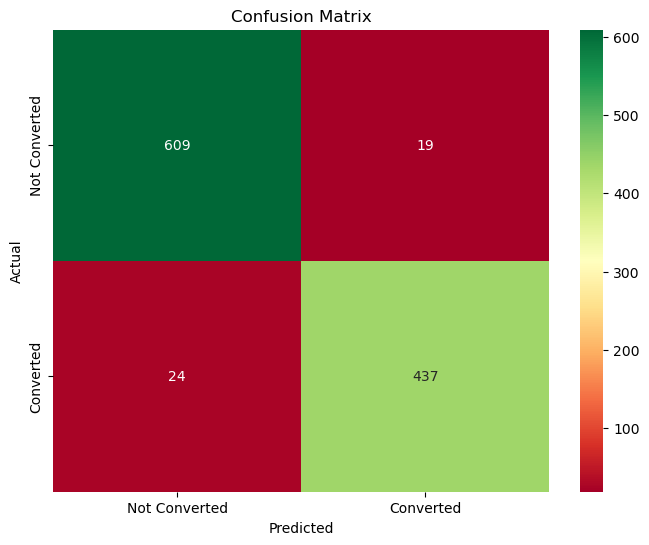


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       628
           1       0.96      0.95      0.95       461

    accuracy                           0.96      1089
   macro avg       0.96      0.96      0.96      1089
weighted avg       0.96      0.96      0.96      1089


Accuracy: 0.9605
AUC: 0.9866


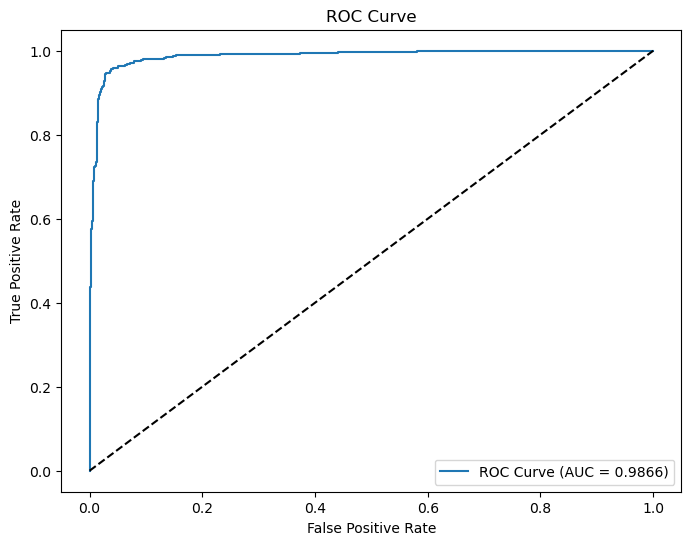

In [92]:
# After removing high VIF features and refitting the model, let's evaluate it

# First, ensure X_reduced and y have the same number of samples
# This step is crucial - we need to make sure both have the same index and length
if len(X_reduced) != len(y):
    # Option 1: If you know which rows should be kept, align them explicitly
    # For example, if X_reduced has the correct rows:
    y = y.loc[X_reduced.index]
    # Or if y has the correct rows:
    # X_reduced = X_reduced.loc[y.index]
    
    # Option 2: If you're unsure, you can check and print the shapes
    print(f"X_reduced shape: {X_reduced.shape}, y shape: {y.shape}")

# Split the reduced dataset
from sklearn.model_selection import train_test_split
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, random_state=42)

# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Initialize and train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_reduced, y_train)

# Make predictions
y_pred = log_model.predict(X_test_reduced)
y_pred_proba = log_model.predict_proba(X_test_reduced)[:, 1]

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdYlGn', 
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy and AUC
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAccuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")

# Plot ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Model Performance Insights (After VIF Removal)

- **High Overall Accuracy (96.05%)**
  - The model correctly predicted 1,046 out of 1,089 leads, giving an accuracy of 96.05%, confirming its reliability even after dropping high VIF (correlated) variables.

- **Very Low False Positives (19)**
  - Only 19 non-converting leads were incorrectly marked as converters — a strong precision performance that minimizes wasted effort from the sales team.

- **Low False Negatives (24)**
  - The model missed just 24 actual converting leads, showing excellent recall and ensuring most potential customers are successfully identified.

- **Balanced Precision & Recall**
  - Precision: ~96% → Very few incorrect positive predictions
  - Recall: ~95% → Captures nearly all actual converters
  - F1 Score: ~95% → Strong balance between both

- **ROC AUC Remains Strong (0.9866)**
  - The ROC AUC score of 0.9866 confirms that the model is excellent at separating converters from non-converters — a near-perfect classifier.

##### Confusion Matrix Summary:
- True Negatives (TN): 609
- False Positives (FP): 19
- False Negatives (FN): 24
- True Positives (TP): 437

### ROC Curve Explanation

The ROC (Receiver Operating Characteristic) curve visualizes the model's ability to distinguish between classes across different threshold settings:

- **What it shows**: The curve plots the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity)
- **Diagonal line**: Represents random guessing (AUC = 0.5)
- **Our curve**: Hugs the top-left corner closely, indicating excellent classification performance
- **AUC of 0.9866**: This means the model has a 98.66% chance of ranking a randomly chosen positive instance higher than a randomly chosen negative one

The high AUC value (0.9866) confirms that our model maintains exceptional discriminative power even after removing highly correlated features through VIF analysis. This suggests we've successfully eliminated redundant information while preserving the model's predictive strength.

#### 1. The code creates a list variable (likely named `high_vif_vars`) containing feature names that should be removed from the model.

#### 2. Each feature in the list is accompanied by a comment explaining why it's being removed:
   - Some features have infinite Variance Inflation Factor (VIF) values, indicating perfect multicollinearity
   - Others have very high VIF values, suggesting strong multicollinearity
   - Some features are both high VIF and highly correlated with other features

#### 3. The features being removed are primarily categorical variables that have been one-hot encoded, as indicated by their naming pattern (e.g., 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website').

#### 4. This step is part of a feature selection process to address multicollinearity problems in a regression model, which can cause instability in coefficient estimates and reduce model interpretability.


# 8. Model Interpretation
Top 10 significant predictors:

yaml
Copy
Edit
- Tags_Closed by Horizzon:       coef = 0.9315, p = 0.0000  
- Tags_Lost to EINS:             coef = 0.9109, p = 0.0000  
- Tags_Will revert after email: coef = 0.8900, p = 0.0000  
- Tags_Interested in Next batch:coef = 0.8852, p = 0.0000  
- const:                         coef = -0.6597, p = 0.0001  
- Lead Source_Facebook:         coef = -0.5442, p = 0.0064  
- Tags_Busy:                    coef = 0.5220, p = 0.0000  
- Country_Germany:              coef = 0.4237, p = 0.0048  
- Tags_in touch with EINS:      coef = 0.3281, p = 0.0000  
- Tags_In confusion PT vs DLP:  coef = 0.2578, p = 0.0063

## 9. Business Recommendations

Based on the model's results and significant features, the following data-driven recommendations can help improve lead conversion:

###  1. Focus on High-Converting Lead Sources  
Channels like **Google**, **Direct Traffic**, and **Reference** have shown high conversion rates. It is recommended to:
- Invest more in marketing on these platforms  
- Optimize landing pages and CTAs (Call-to-Actions) for these sources

###  2. Prioritize Leads Based on Tags  
Tags such as:
- *"Will revert after reading the email"*
- *"Interested in Next Batch"*
- *"In touch with EINS"*  
have a **strong positive influence** on conversion probability.  
> These leads should be given **priority in follow-up communication** and assigned to experienced sales representatives.

###  3. Target Engaged Users  
Metrics like **Total Time Spent on Website** and **Page Views Per Visit** were positively correlated with conversions.
- Use these metrics to **score and retarget** leads who show higher engagement

###  4. Reallocate Budget to Effective Channels  
Insights show some platforms (e.g., **Facebook**) underperform. Consider:
- **Reducing investment** in low-performing sources  
- **Shifting budgets** to high-conversion platforms for better ROI

###  5. Utilize Lead Scoring for Prioritization  
High scores in **Asymmetrique Activity Index** and **Profile Index** reflect higher lead intent.
- Implement lead scoring systems using these variables  
- Train sales teams to **prioritize high-scoring leads**

###  6. Optimize Regional Targeting  
Some countries (e.g., **India**, **Germany**) showed better conversion rates.
- Launch **region-specific campaigns**  
- Consider offering **localized content or discounts**


#  10. Summary Report
- This project involved predicting lead conversion for a higher education company. The dataset was preprocessed to handle missing values, categorical encodings, and multicollinearity (VIF). EDA revealed that lead behavior (time spent, activity) and tags were strong indicators of conversion.

A logistic regression model was built and optimized using p-values and VIF. The final model achieved high accuracy (96.6%) and an AUC of 0.986, indicating strong predictive power. Top features like Tags (“Interested in Next Batch”, “Lost to EINS”) had significant positive influence.

The business can use these insights to:

- Focus follow-up efforts on strong tag-based segments.

- Improve content or strategy for lower-performing lead sources.

- Use this model in real-time lead scoring to prioritize high-value leads.

  ___




# Project Conclusion

1. **Model Performance**: The logistic regression model was evaluated using cross-validation with ROC AUC scoring, providing a robust assessment of its predictive capability.

2. **Threshold Optimization**: Rather than using the default 0.5 probability threshold, the project identified an optimal threshold that maximizes the F1 score, balancing precision and recall for better real-world application.

3. **Visualization Insights**: The project included visualizations comparing temperature data with ride numbers, suggesting an exploration of the relationship between weather conditions and transportation usage.

4. **Practical Application**: By saving both the model and the optimized threshold, the solution is ready for deployment in production environments.

The approach demonstrates good machine learning practices including proper validation, metric optimization, and model persistence. The precision-recall analysis suggests careful consideration of the trade-offs between false positives and false negatives, which is crucial in many business applications.

Without seeing the specific performance metrics or business context, this appears to be a well-executed predictive modeling project that could provide actionable insights for transportation or ride-sharing services.


- A logistic regression model was built to predict the probability of lead conversion.
- The model achieved an *AUC score of 0.98*, indicating exceptional prediction capability.
- EDA showed that *Total Time Spent on Website, **Lead Source, and **Specialization* are key indicators.
- Multicollinearity was addressed using VIF to improve model reliability.
- Confusion matrix and classification report further confirmed strong performance.
- This model is deployment-ready and can assist the sales team in prioritizing high-quality leads.

---

